In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import default_rng

random_seed = 42
rng = default_rng(random_seed)

In [2]:
n_samples = 50

X_df = pd.DataFrame(
    np.array([
        rng.standard_normal(size=n_samples),
        rng.exponential(size=n_samples),
        st.halfcauchy.rvs(scale=10, size=n_samples, random_state=random_seed),
    ]).T
)

X_df.head()

,0,1,2
0,0.304717,0.167356,6.671342
1,-1.039984,1.315057,128.911121
2,0.750451,3.995756,22.333791
3,0.940565,0.563538,13.703003
4,-1.951035,0.284040,2.501008


<AxesSubplot:xlabel='2', ylabel='Count'>

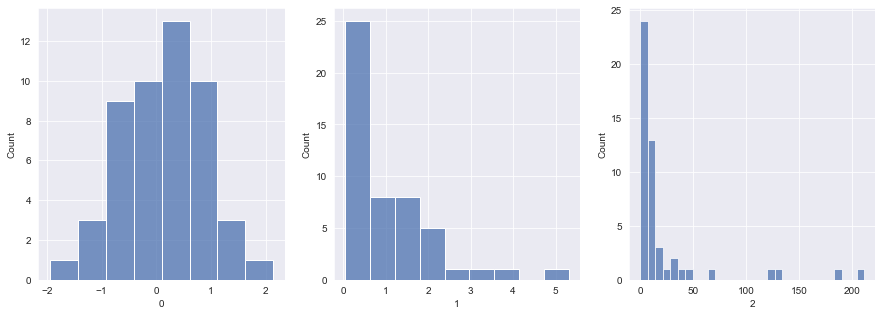

In [3]:
sns.set({'figure.figsize': (15, 5)})
fig, axarr = plt.subplots(1, 3)

sns.histplot(X_df.iloc[:, 0], ax=axarr[0])
sns.histplot(X_df.iloc[:, 1], ax=axarr[1])
sns.histplot(X_df.iloc[:, 2], ax=axarr[2])

In [4]:
def generate_feature_weights(feature_df, weights_type='MAD'):
    """Generate feature weights from data.
    
    Options for weights_type:
      - 'MAD': mean absolute deviation
      - 'max LOF': local outlier factor of max
      - 'average LOF': average local outlier factor
      - 'kurtosis': kurtosis of input distribution
    """
    if weights_type == 'MAD':
        weights = feature_df.mad(axis=0).values
        
    # should have one weight per feature
    assert weights.shape[0] == feature_df.shape[1]
    
    return weights

In [5]:
print(generate_feature_weights(X_df))

[ 0.61155758  0.77936541 26.17120734]
